## SMALL PROJECT COVID 19: 

### Abstract

The aim of this study is to visualize the evolution of Covid-19 in Italy in its earliest stage. Based on two typical models used to study the evolution of viral epidemics, the SIR and SEIR models, an attempt will be made to estimate the evolution of the pandemic at the local level, taking into account the number of inhabitants in Hungary. For both models,two main scenarios will be simulated, one where the population is fully exposed to the disease and the other where a given quarentine is imposed to the population. The aim is to find the most appropriate parameters to bring the model as close as possible to the real situation and to predict how the disease could evolve in the given country. 

### Introduction

The coronavirus are viruses that attact human's respiratory tract agressively causing illness which can extend from colds or pneumonia to Severe Acute Respiratory Syndrome (SARS). In the city of Wuhan, China, a new coronavirus was discovered, the outbreak of Sars-Cov-2 started. It was just the beginning, this virus, which would later appear in history books, replicated rapidly. So much so that it managed to cross borders and continents and its incidence fell in Europe, more specifically in Italy. Since then, European countries have been affected by these infectious disease with a huge number of deaths and of people with sequelae. Epidemiological studies, such as those simulated in this project, were of great help in making predictions about the long-term evolution and incidence of the pandemic in Hungary, one of the countries affected in Europe. 

The main goal of this project is to achieve to simulate the time evolution of Covid-19 in an specific region, in this case Hungary, within different epidemic models explained below (SIR, SEIR etc.). In addition, the goal is to stimate the optimal parameteres that rule these models to fit the real data and predict important event such as the effect of a quarentine or the end of the epidemic.

### Methodology

In [18]:
import pandas as pd
import numpy as np
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

#### Dataset ####

All the data is extracted from 3 different CSV files where the number of confirmed, dead and recovered people from the Covid 19 pandemics are stored for nearly all the regions in the planet that were affected. Then, from all the data, the region to be studied chosen is Hungary, because the infection evolution after loading the data shows two interesting peaks revealed that are likeable to be modelled by SIR or SEIR. 

In [19]:
import csv
df =pd.DataFrame()
print(df)

with open('time_series_covid19_confirmed_global.csv', mode='r') as file1: 
  csvInfected=csv.reader(file1)
  Infected_list=[]
  for line in csvInfected:
    if len(line)>2:
      if line[1]=='Hungary':
        for valor in line: 
          Infected_list.append(valor)

with open('time_series_covid19_deaths_global.csv', mode='r') as file2: 
  csvDeaths=csv.reader(file2)
  Deaths_list=[]
  for line in csvDeaths:
    if len(line)>2:
      if line[1]=='Hungary':
        for valor in line: 
          Deaths_list.append(valor)

with open('time_series_covid19_recovered_global.csv', mode='r') as file3: 
  csvRecovered=csv.reader(file3)
  Recovered_list=[]
  for line in csvRecovered:
    if len(line)>2:
      if line[1]=='Hungary':
        for valor in line: 
          Recovered_list.append(valor)

del Infected_list[0:4]
del Deaths_list[0:4]
del Recovered_list[0:4]
t_vec= np.linspace(1, len(Infected_list), num= len(Infected_list))
df['Days']= t_vec
df['Cumulated_Infections']= Infected_list  
df['Cumulated_Deaths']= Deaths_list
df['Cumulated_Recovered']= Recovered_list
Infected=[]
for i in range(len(Infected_list)):
  value= int(df['Cumulated_Infections'][i])-int(df['Cumulated_Recovered'][i])-int(df['Cumulated_Deaths'][i])
  Infected.append(value)
df['Infected_day']= Infected
df


Empty DataFrame
Columns: []
Index: []


,Days,Cumulated_Infections,Cumulated_Deaths,Cumulated_Recovered,Infected_day
0,1.0,0,0,0,0
1,2.0,0,0,0,0
2,3.0,0,0,0,0
3,4.0,0,0,0,0
4,5.0,0,0,0,0
...,...,...,...,...,...
1138,1139.0,2195926,48751,0,2147175
1139,1140.0,2195926,48751,0,2147175
1140,1141.0,2195926,48751,0,2147175
1141,1142.0,2196804,48762,0,2148042


In Figure 1, the evolution of the infectedd population against the time is represented. The two interesting peaks located in the interval of time (200:500) can be depicted in the figure as mentioned before. 

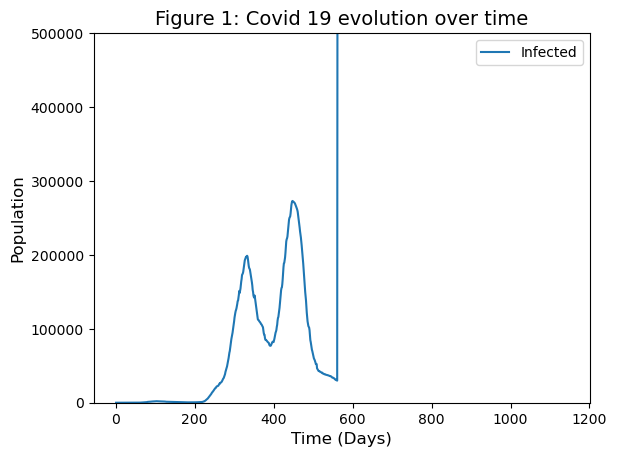

In [20]:
plt.figure(1)
plt.plot(t_vec, df['Infected_day'], label='Infected' )
plt.title('Figure 1: Covid 19 evolution over time', fontsize=14)
plt.xlabel('Time (Days)', fontsize=12)
plt.ylabel('Population', fontsize=12)
plt.ylim(0, 0.5*10**6)
plt.legend()
plt.show()

In Figure 2, the evolution of Covid 19 against time is represented again but with a bar plot shape to see population groups that are created in the 2 peaks phase. 

(0.0, 500000.0)

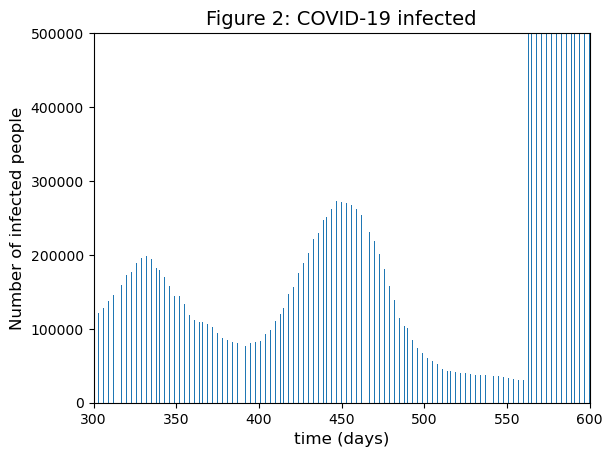

In [21]:
plt.figure(2)
plt.bar(t_vec,df['Infected_day'], width = 0.2)
plt.title('Figure 2: COVID-19 infected', fontsize = 14)
plt.xlabel('time (days)', fontsize = 12)
plt.ylabel('Number of infected people', fontsize = 12)
plt.xlim(300,600)
plt.ylim(0,0.5e6)

Between the 2 peaks revealed by the dataset, the one that is decided to be studied is the first peak, as it is shown below in Figure 3. 

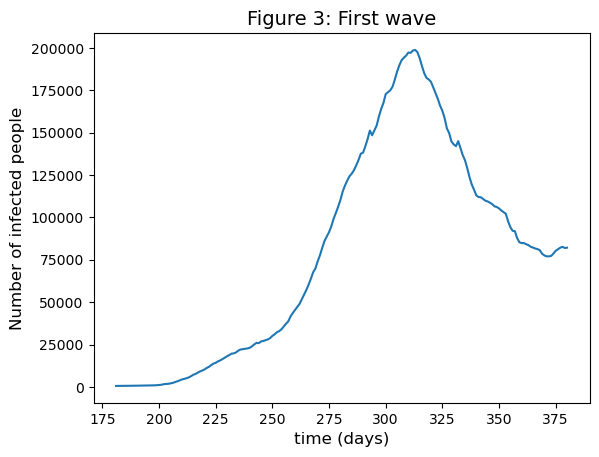

In [22]:
inf_onada = df['Infected_day'][200:400]
t_onada = t_vec[180:380]
plt.plot(t_onada, inf_onada)
plt.title('Figure 3: First wave', fontsize = 14)
plt.xlabel('time (days)', fontsize = 12)
plt.ylabel('Number of infected people', fontsize = 12)
plt.show()


#### 1st Scenario: Fitting the SIR model

The SIR model is one of the simplest epidemiological models which are capable of capturing tipycal characteristics of epidemiological outbreaks. Its name is explained by the fact that the model involves as variables the susceptible, infected and recovered population relating all of them through the infection rate and the average infection period. This 3-compartment model works under the assumption that the whole population is represented as a closed system.

The SIR model is represented by a set of differential equations: 

$$ {dS \over dt} = {-rSI }$$

$$ {dI \over dt} = {rSI} - {aI} $$

$$ {dR \over dt} = {aI} $$

#### Training the SIR model 

A sweep in the initial susceptible population and the reproduction ratio is done to study different parametres. Through RMS error, the model tunned by each one of the parameters combinations is compared to the real data, and the parameters combination providing the ninimum error is the one that will be used to perform the train of the model. For training the model, about 62.5% of the data is used.

In [23]:
t_train = t_vec[200:325]
inf_train = df['Infected_day'][175:300]

def SIR(sols, N,t, r, a):
  S,I,R = sols
  dSdt= ((-r)*S*I)
  dIdt= (r*S*I)-a*I
  dRdt= a*I 
  return ([dSdt, dIdt, dRdt])
a=1/2.3
R0=0
I0=1
N = 9e6
S0 = np.linspace(8e6, 9e6, num = 100)
#t2 = np.linspace(0,100, num = 100)
#infected2=df['Daily_infected'][0:100]
r_values= np.linspace(0.00000006,0.00000007, num= 100)
RMS_infected=[]
for k in S0:
    for i in r_values: 
      Y1= odeint(SIR, [k,I0,R0], t_train, args=(N,i,a) )
      I_sols= Y1[:,1]
      RMS= np.square(((np.subtract(inf_train, I_sols))).mean())
      RMS_infected.append(RMS)
print('The minimum RMS between the simulation and the real data is: {}'.format(min(RMS_infected)))

for k in S0:
    for i in r_values: 
        Y1= odeint(SIR, [k,I0,R0], t_train, args=(N,i,a) )
        I_sols= Y1[:,1]
        RMS= np.square(((np.subtract(inf_train, I_sols))).mean())
        if RMS == min(RMS_infected):
            millor_r = i
            millor_S0 = k
            
print('The best value of r for the model is {}'.format(millor_r)) 
print('The best value of S0 for the model is {}'.format(millor_S0)) 


The minimum RMS between the simulation and the real data is: 0.8641052948176481
The best value of r for the model is 6.676767676767677e-08
The best value of S0 for the model is 8090909.090909091


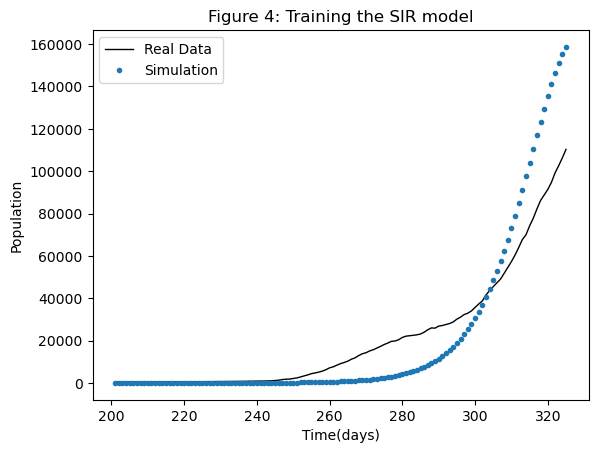

In [24]:
S0 = millor_S0
r = millor_r
I0 =1
Y1= odeint(SIR, [S0,I0,R0], t_train, args=(N,r, a))
I_sols= Y1[:,1]
plt.plot(t_train,inf_train, 'k', linewidth = 1, label = 'Real Data') #dades reals
plt.xlabel('Time(days)')
plt.ylabel('Population')
plt.title('Figure 4: Training the SIR model')
plt.plot(t_train,I_sols,'.', linewidth = 2, label = 'Simulation') #simulacio
plt.legend()
plt.show()

#### Predicting SIR 

From fitting the data with the SIR model, the further evolution of the curve is aimed to be predicted. In Figure 5, the resulting model is applied and shapes pretty precisely the evolution of the infected curve extracted from the dataset. For the prediction, the rest of the data extracted is used to model the descent of the peak, so about a 37.5% of the data.  

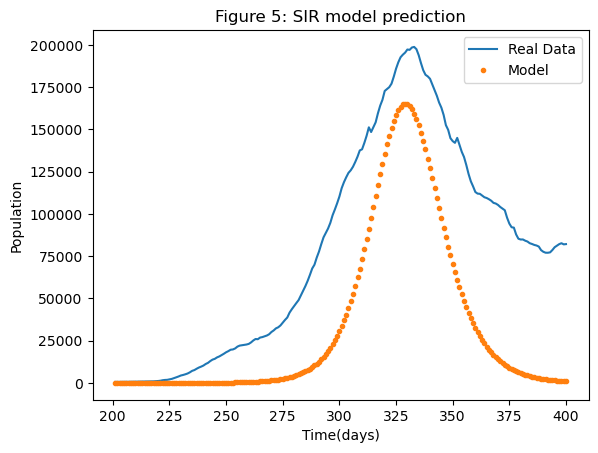

In [25]:
inf_onada = df['Infected_day'][200:400]
t_onada = t_vec[200:400]

S0 = millor_S0
r = millor_r
Y= odeint(SIR, [S0,I0,R0], t_onada, args=(N,r, a))
I_sols= Y[:,1]
plt.plot(t_onada, inf_onada, label= 'Real Data')
plt.plot(t_onada, I_sols, '.', label= 'Model')
plt.xlabel('Time(days)')
plt.ylabel('Population')
plt.title('Figure 5: SIR model prediction')
plt.legend()
plt.show()


#### Reproductive number and epidemic outcome:

The reproduction number is a parameter used int both the SIR and the SEIR model to predict the outcome of the epidemic. If Ro < 1 the epidemic is controlled, otherwise the epidemic is outbreaking. In this project the reproduction number was used to asses the end of the epidemic. Ro can be computed as:

$$ {Ro} = {rSo \over a } $$

In [26]:
I0 = 1
Ro = (r*S0)/a
print('Ro = {}'.format(Ro))

#predicting the end of the epidemic

Y = odeint(SIR, [S0,I0,R0], t_onada, args=(N,r,a))
I = Y[:,1]
S = Y[:,0]

if Ro > 1:
    for t in range(len(t_onada)):
        dIdt= (r*S[t]*I[t])-a*I[t]
        if dIdt < 0 and t_onada[t] > 300:
            print('The epidemic will end at t = {}'.format(t_onada[t]))
            break

Ro = 1.2424857667584939
The epidemic will end at t = 330.0


####  2nd Scenario: Fitting the SIR Quarentine model

This model assumes while following the SIR original model, that a percentage of the infected population is isolated so they can not infect other suceptible people. Therefore, as it can be seen in the graph, the curves are smoother.

#### Training the SIR with quarentine model

A sweep in the quarentine factor and the reproduction ratio is done to study different parametres. Through RMS error, the model tunned by each one of the parameters combinations is compared to the real data, and the parameters combination providing the ninimum error is the one that will be used to perform the train of the model. The same amount of data as in regular SIR model is used, so about 62.5%. 

In [27]:
t_train = t_vec[200:325]
inf_train = df['Infected_day'][175:300]


def SIR_quarentine(sols,t, r, a,q):
  S,I,R = sols
  dSdt= ((-r)*S*I)
  dIdt= (r*S*I)-a*I - (q*I)
  dRdt= a*I + (q*I)
  return ([dSdt, dIdt, dRdt])

a=1/2.3
R0=0
I0=1
N = 9e6
q_vals = np.linspace(0.001,0.03,num = 100)
S0 = 9e6
r_values= np.linspace(0.00000006,0.00000007, num= 100)
RMS_infected=[]
for q in q_vals:
    for i in r_values: 
      Y1= odeint(SIR_quarentine, [S0,I0,R0], t_train, args=(i,a,q))
      I_sols= Y1[:,1]
      RMS= np.square(((np.subtract(inf_train, I_sols))).mean())
      RMS_infected.append(RMS)
print('The minimum RMS between the simulation and the real data is: {}'.format(min(RMS_infected)))

for q in q_vals:
    for i in r_values: 
        Y1= odeint(SIR_quarentine, [S0,I0,R0], t_train, args=(i,a,q) )
        I_sols= Y1[:,1]
        RMS= np.square(((np.subtract(inf_train, I_sols))).mean())
        if RMS == min(RMS_infected):
            millor_r2 = i
            millor_q = q

print('The best value of r for the model is {}'.format(millor_r2)) 
print('The best value of q for the model is {}'.format(millor_q)) 


The minimum RMS between the simulation and the real data is: 0.41768669945990705
The best value of r for the model is 6.01010101010101e-08
The best value of q for the model is 0.001292929292929293


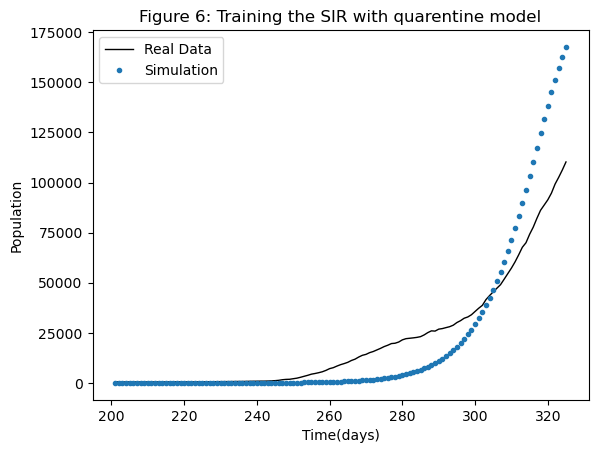

In [28]:
q = millor_q
r = millor_r2
I0 =1
Y1= odeint(SIR_quarentine, [S0,I0,R0], t_train, args=(r, a,q))
I_sols= Y1[:,1]
plt.plot(t_train,inf_train, 'k', linewidth = 1, label = 'Real Data') #dades reals
plt.xlabel('Time(days)')
plt.ylabel('Population')
plt.title('Figure 6: Training the SIR with quarentine model')
plt.plot(t_train,I_sols,'.', linewidth = 2, label = 'Simulation') #simulacio
plt.legend()
plt.show()

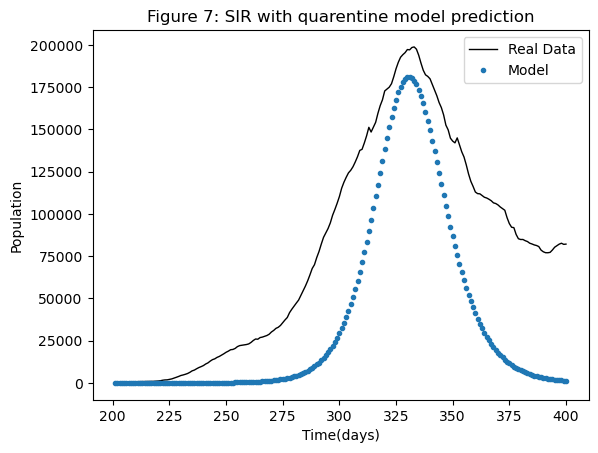

In [29]:
inf_onada = df['Infected_day'][200:400]
t_onada = t_vec[200:400]

q = millor_q
r = millor_r2
I0 =1
Y1= odeint(SIR_quarentine, [S0,I0,R0], t_onada, args=(r, a,q))
I_sols= Y1[:,1]
plt.plot(t_onada,inf_onada, 'k', linewidth = 1, label = 'Real Data') #dades reals
plt.xlabel('Time(days)')
plt.ylabel('Population')
plt.title('Figure 7: SIR with quarentine model prediction')
plt.plot(t_onada,I_sols,'.', linewidth = 2, label = 'Model') #simulacio
plt.legend()
plt.show()

## Reproductive number and epidemic outcome

In [30]:
I0 = 1
Ro = (r*S0)/a
print('Ro = {}'.format(Ro))

#predicting the end of the epidemic

Y = odeint(SIR_quarentine, [S0,I0,R0], t_onada, args=(r,a,q))
I = Y[:,1]
S = Y[:,0]

if Ro > 1:
    for t in range(len(t_onada)):
        dIdt= (r*S[t]*I[t])-a*I[t] - (q*I[t])
        if dIdt < 0 and t_onada[t] > 300:
            print('The epidemic will end at t = {}'.format(t_onada[t]))
            break

Ro = 1.244090909090909
The epidemic will end at t = 331.0


 #### 3rd Scenario: Fitting the SEIR model
 
 #### Training the SEIR model
 
 The same amount of data and parametres are used and tunned in this SEIR model. 

In [39]:
t_train = t_vec[200:325]
inf_train = df['Infected_day'][175:300]

def SEIR(sols,t, r, a, mu):
  S,E,I,R = sols
  dSdt= (-r)*S*I
  dEdt= r*S*I-mu*E
  dIdt= mu*E-a*I
  dRdt= a*I
  return ([dSdt,dEdt, dIdt, dRdt])

rseir=0.025
a = 1 / 5.2
mu= 1/5.4
E0=0
R0=0
I0=1
S0= np.linspace(1.5e6,2e6, num = 100)
r_values= np.linspace(27e-8,32e-8, num= 100)
RMS_infected=[]
for k in S0:
    for i in r_values: 
      Y1= odeint(SEIR, [k,E0,I0,R0], t_train, args=(i,a,mu))
      I_sols= Y1[:,2]
      RMS= np.square(((np.subtract(inf_train, I_sols))).mean())
      RMS_infected.append(RMS)
print('The minimum RMS between the simulation and the real data is: {}'.format(min(RMS_infected)))

for k in S0:
    for i in r_values: 
        Y1= odeint(SEIR, [k,E0,I0,R0], t_train, args=(i,a,mu))
        I_sols= Y1[:,2]
        RMS= np.square(((np.subtract(inf_train, I_sols))).mean())
        if RMS == min(RMS_infected):
            millor_r2 = i
            millor_S0 = k
            
print('The best value of r for the model is {}'.format(millor_r)) 
print('The best value of S0 for the model is {}'.format(millor_S0)) 




The minimum RMS between the simulation and the real data is: 1.1816676543434534
The best value of r for the model is 6.676767676767677e-08
The best value of S0 for the model is 1702020.202020202


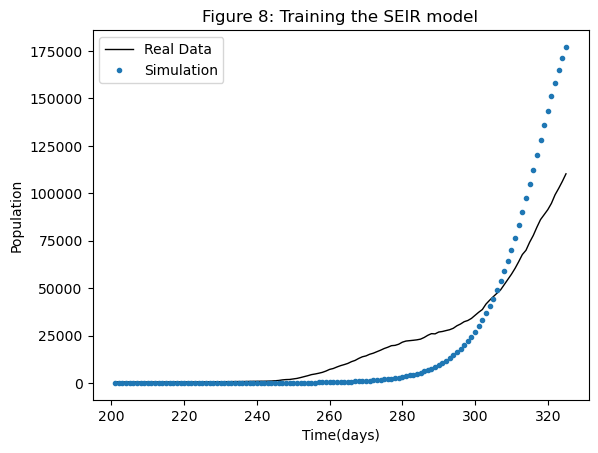

In [32]:
S0 = millor_S0 
r = millor_r2
I0 =1
Y1= odeint(SEIR, [S0,E0,I0,R0], t_train, args=(r,a,mu))
I_sols= Y1[:,2]
plt.plot(t_train,inf_train, 'k', linewidth = 1, label = 'Real Data') #dades reals
plt.xlabel('Time(days)')
plt.ylabel('Population')
plt.title('Figure 8: Training the SEIR model')
plt.plot(t_train,I_sols,'.', linewidth = 2, label = 'Simulation') #simulacio
plt.legend()
plt.show()

#### Predicting SEIR model

The prediction of the model is assessed as in last models and the amount of data used is 37.5%

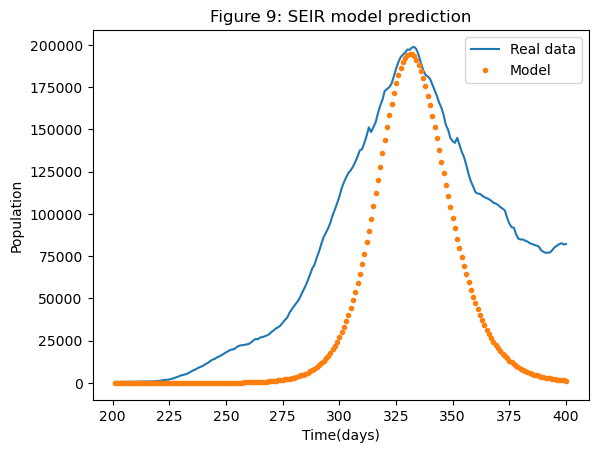

In [33]:
inf_onada = df['Infected_day'][200:400]
t_onada = t_vec[200:400]

S0 = millor_S0 
r = millor_r2
Y= odeint(SEIR, [S0,E0,I0,R0], t_onada, args=(r,a,mu))
I_sols= Y[:,2]
plt.plot(t_onada, inf_onada, label= 'Real data')
plt.plot(t_onada, I_sols, '.', label= 'Model')
plt.xlabel('Time(days)')
plt.ylabel('Population')
plt.title('Figure 9: SEIR model prediction')
plt.legend()
plt.show()


#### Reproductive number and epidemic outcome

In [34]:
I0 = 1
Ro = (r*S0)/a
print('Ro = {}'.format(Ro))

#predicting the end of the epidemic

Y = odeint(SEIR, [S0,E0,I0,R0], t_onada, args=(r,a,mu))
I = Y[:,2]
E = Y[:,1]

if Ro > 1:
    for t in range(len(t_onada)):
        dIdt= mu*E[t]-a*I[t]
        if dIdt < 0 and t_onada[t] > 300:
            print('The epidemic will end at t = {}'.format(t_onada[t]))
            break

Ro = 2.523734925007653
The epidemic will end at t = 332.0


#### Fitting SEIR Quarentine

#### Training SEIR Quarentine model 

In [35]:
t_train = t_vec[200:325]
inf_train = df['Infected_day'][175:300]

def SEIRQ(sols,t, r, a, mu, q):
  S,E,I,R = sols
  dSdt= (-r)*S*I
  dEdt= r*S*I-mu*E
  dIdt= mu*E-a*I - q*I
  dRdt= a*I + q*I
  return ([dSdt,dEdt, dIdt, dRdt])

E0=0
R0=0
I0=1
S0 = millor_S0

q_vals = np.linspace(0.001,0.04,num = 100)
r_values= np.linspace(2.9e-7,3.25e-7, num= 100)
RMS_infected=[]
for q in q_vals:
    for i in r_values: 
      Y1= odeint(SEIRQ, [S0,E0,I0,R0], t_train, args=(i,a,mu,q))
      I_sols= Y1[:,2]
      RMS= np.square(((np.subtract(inf_train, I_sols))).mean())
      RMS_infected.append(RMS)
print('The minimum RMS between the simulation and the real data is: {}'.format(min(RMS_infected)))

for q in q_vals:
    for i in r_values: 
        Y1= odeint(SIR_quarentine, [S0,I0,R0], t_train, args=(i,a,q) )
        I_sols= Y1[:,2]
        RMS= np.square(((np.subtract(inf_train, I_sols))).mean())
        if RMS == min(RMS_infected):
            millor_r2 = i
            millor_q = q

print('The best value of r for the model is {}'.format(millor_r2))
print('The best value of q for the model is {}'.format(millor_q))

The minimum RMS between the simulation and the real data is: 0.7345799208717082
The best value of r for the model is 2.8515151515151516e-07
The best value of q for the model is 0.001292929292929293


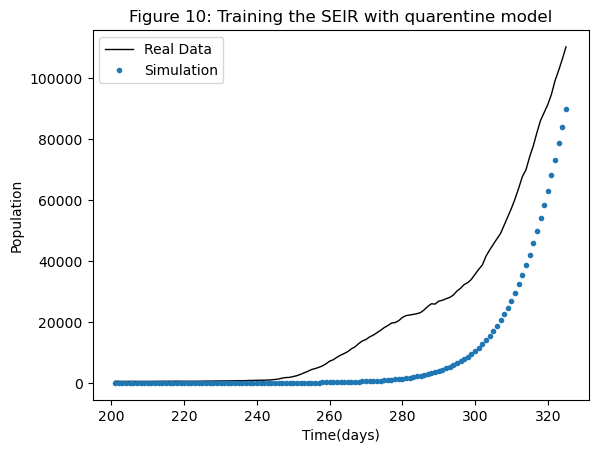

In [41]:
S0 = millor_S0 
r = millor_r2

Y1= odeint(SEIRQ, [S0,E0,I0,R0], t_train, args=(r,a,mu,q))
I_sols= Y1[:,2]
plt.plot(t_train,inf_train, 'k', linewidth = 1, label = 'Real Data') #dades reals
plt.xlabel('Time(days)')
plt.ylabel('Population')
plt.title('Figure 10: Training the SEIR with quarentine model')
plt.plot(t_train,I_sols,'.', linewidth = 2, label = 'Simulation') #simulacio
plt.legend()
plt.show()

#### Predicting SEIR Quarentine model

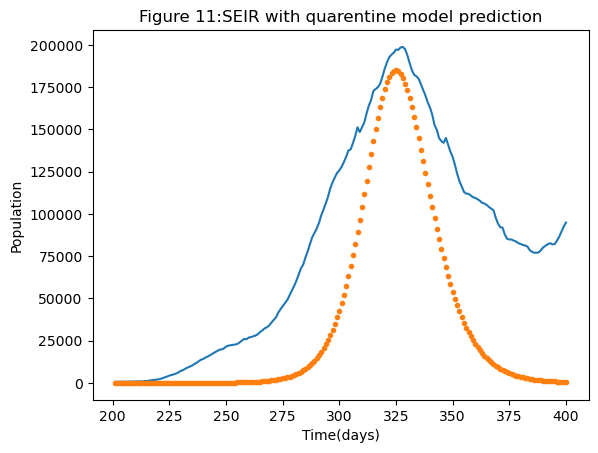

In [42]:
inf_onada = df['Infected_day'][205:405]
t_onada = t_vec[200:400]
r = 3.15e-7
q = 0.02
Y= odeint(SEIRQ, [S0,E0,I0,R0], t_onada, args=(r,a,mu,q))
I_sols= Y[:,2]
plt.plot(t_onada, inf_onada)
plt.plot(t_onada, I_sols, '.')
plt.xlabel('Time(days)')
plt.ylabel('Population')
plt.title('Figure 11:SEIR with quarentine model prediction')
plt.show()

#### Reproductive number and epidemic outcome

In [38]:
I0 = 1
Ro = (r*S0)/a
print('Ro = {}'.format(Ro))

#predicting the end of the epidemic

Y = odeint(SEIRQ, [S0,E0,I0,R0], t_onada, args=(r,a,mu,q))
I = Y[:,2]
E = Y[:,1]

if Ro > 1:
    for t in range(len(t_onada)):
        dIdt= mu*E[t]-a*I[t] - q*I[t]
        if dIdt < 0 and t_onada[t] > 300:
            print('The epidemic will end at t = {}'.format(t_onada[t]))
            break

Ro = 2.7879090909090913
The epidemic will end at t = 325.0


### RESULTS COMPARISON

   | | SIR  | SIR QUARENTINE   | SEIR   | SEIR QUARENTINE  |
|---:|:-------------|:-----------|:------|:------|
| best r | 6.68e-8  | 6.01e-8      | 6.68e-8   | 2.85e-7    |
| best S0 | 8.1e+6 | 8.1e+6   | 1.7e+6   | 1.7e+6   |
| best q |   | 0.0013    |    | 0.0013    |
| min RMS | 0.86  | 0.41    | 1.18    | 0.73  |
| Ro | 1.24  | 1.24    | 2.52  | 2.52  |
| Epidemic extiction | 330  | 330    | 332   | 324   |


### Discussion and conclusions

The end of the pandemics in the SIR model has the same value with or without the quarentine factor, considering that for obtaining the best fitting the value of the infective rate is sweeped and the value that fits the best is chosen, this fact can be understood. However, in the SEIR model, the pandemics ends before while imposing a quarentine than without it. Such low errors may be risking the model into a certain overfitting, however, graphically it is observed that in this case, the descent of the data is more or less trustfully represented, considering the limitations of both models. At the beginning, when such a small RMS were obtained, it was thought that the prediction accuracy will be resulting in overfitting, it wasn't the case for these dataset. 

The 2 models (SIR and SEIR) have some important limitations that generate that models aren´t capable of representing faithfully the curves from the original dataset:

- the infective rate and quarentine factor remain constant during the whole period of the pandemics

- these two models impose that the total population remains constant during all the pandemics

- population that has been infected once can´t catch again the disease

To sum up, even though the possible problems in the models found and the limitations commented, the simulations of the Covid-19 in the population of Hungary have been welll reproduced for both SIR and SEIR models. Even though in SIR model quarentine seems to not be effective, SEIR model shows that quarentine would have been effective. The optimal initial susceptible populations differences between SIR and SEIR models are very noticeable. The infective rate has a very different value in the SEIR with quarentine model compared to the other models. 

### Advanced model? 

#### SIS model

As it is known, Covid-19 is an infectious disease that can be catched more that once by a person that has already being infected. The SIS model is a variation of SIR that takes into account this possibility by only modelling an evolution of the susceptible and infected populations against time. This removes one of the limitations that presents the SIR model. 

The SIS model is represented by a set of differential equations: 

$$ {dS \over dt} = {-rSI } +{\gamma I}$$

$$ {dI \over dt} = {rSI} - {\gamma I} $$

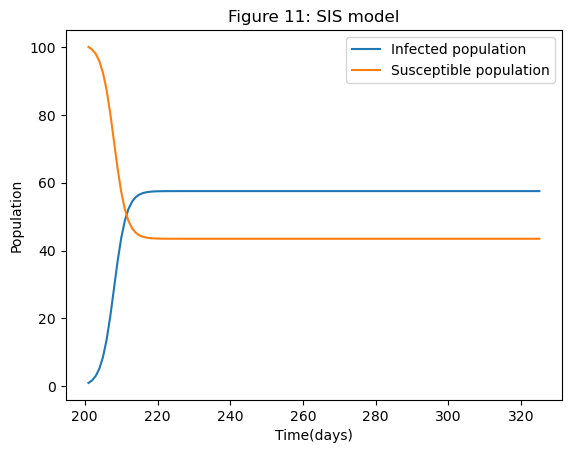

In [57]:
def SIS(sols, t, r, gamma):
    S,I = sols
    dSdt= ((-r)*S*I) + gamma*I
    dIdt= -gamma*I +(r*S*I)
    return ([dSdt, dIdt])
#N = 101
r = 0.01
gamma =1/2.3


Ycomplex= odeint(SIS, [100, 1], t_train, args=(r,gamma))
I_sols= Ycomplex[:,1]
S_sols = Ycomplex[:,0]
plt.plot(t_train, I_sols, label = 'Infected population')
plt.plot(t_train, S_sols, label = 'Susceptible population')
plt.xlabel('Time(days)')
plt.ylabel('Population')
plt.title('Figure 11: SIS model')

plt.legend()
plt.show()


#### Training the SIS model

In [61]:
t_train2 = np.linspace(300,320, num = 20)
inf_train2 = df['Infected_day'][300:320]
S0 = np.linspace(1e6, 6e6, num = 100)
r_values= np.linspace(0.000000288,0.0000003, num= 100)
RMS_infected=[]
for k in S0:
    for i in r_values: 
        Y1= odeint(SIS, [k,I0], t_train2, args=(i,gamma) )
        I_sols= Y1[:,1]
        RMS= np.square(((np.subtract(inf_train2, I_sols))).mean())
        RMS_infected.append(RMS)
print('The minimum RMS between the simulation and the real data is: {}'.format(min(RMS_infected)))

for k in S0:
    for i in r_values: 
        Y1= odeint(SIS, [k,I0], t_train2, args=(i,gamma) )
        I_sols= Y1[:,1]
        RMS= np.square(((np.subtract(inf_train2, I_sols))).mean())
        if RMS == min(RMS_infected):
            millor_r = i
            millor_S0 = k
            
print('The best value of r for the model is {}'.format(millor_r)) 
print('The best value of S0 for the model is {}'.format(millor_S0)) 


The minimum RMS between the simulation and the real data is: 32.64986342267101
The best value of r for the model is 2.953939393939394e-07
The best value of S0 for the model is 1555555.5555555555


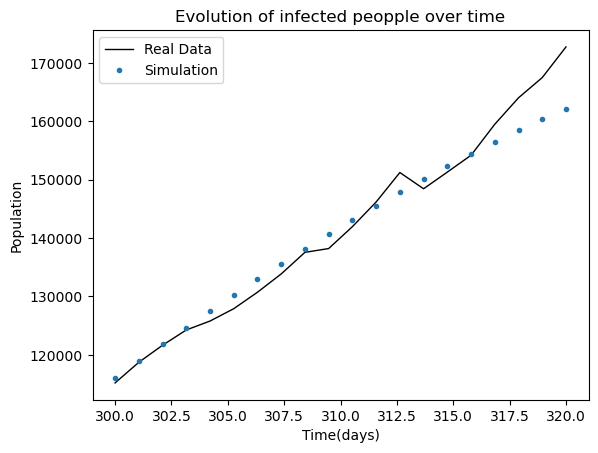

In [62]:
S0 = millor_S0 
r = 2.95e-7
#r = 0.00000047
#S0 = 1e6
I0 =116000


Y1= odeint(SIS, [S0,I0], t_train2, args=(r,gamma))
I_sols= Y1[:,1]
plt.plot(t_train2,inf_train2, 'k', linewidth = 1, label = 'Real Data') #dades reals
plt.xlabel('Time(days)')
plt.ylabel('Population')
plt.title('Evolution of infected peopple over time')
plt.plot(t_train2,I_sols,'.', linewidth = 2, label = 'Simulation') #simulacio
plt.legend()
plt.show()

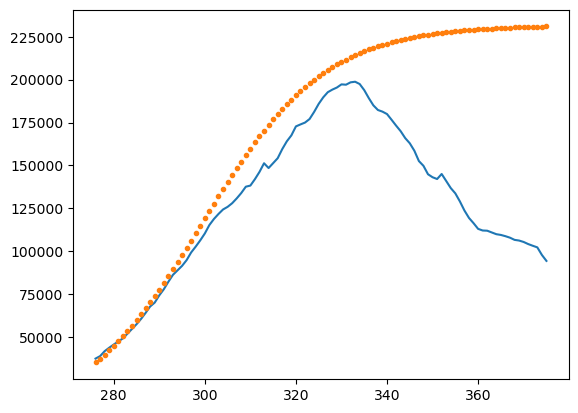

In [71]:
r = 3.2e-07
t_onada2 = t_vec[275:375]
inf_train2 = df['Infected_day'][275:375]
I0 = 35000
Y= odeint(SIS, [1555555.5555555555,I0], t_onada2, args=(r,gamma))
I_sols= Y[:,1]
plt.plot(t_onada2, inf_train2)
plt.plot(t_onada2, I_sols, '.')
plt.show()

The SIS model won't be a suitable option to simulate the evolution of Covid-19, although it has the capacity to represent the rise in the infected curve, it is incapable of showing the descent. This is due to the fact that the model doesn´t involve the recovered population from the disease that is no more infected by the virus. 